In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('data/processed/spotify_lyrics_features.csv')
#Dropping any popularities that are 0 as they are usually just unavailable and not true 0
df = df[df["popularity"] > 0].copy()

#Trimming outlier popularities
p_low, p_high = df["popularity"].quantile([0.01, 0.99])
df = df[(df["popularity"] >= p_low) & (df["popularity"] <= p_high)]
df.head()

,artist,song,link,text,clean_lyrics,language,vocab_richness,sentiment,repetition_ratio,rhyme_density,...,anticipation,trust,surprise,positive,negative,sadness,disgust,joy,query,popularity
0,Everclear,Strawberry,/e/everclear/strawberry_20052042.html,Never been here never coming back \r\nNever w...,never been here never coming back\nnever want ...,en,0.759259,-0.5840,0.240741,0.000000,...,0.157895,0.052632,0.052632,0.000000,0.368421,0.368421,0.000000,0.000000,Strawberry Everclear,42
1,Gary Numan,O.d. Receiver,/g/gary+numan/od+receiver_10127994.html,Heartbeat \r\nI can't see you \r\nHeartbeat ...,heartbeat\ni can't see you\nheartbeat\ni can h...,en,0.760870,-0.2144,0.239130,0.100000,...,0.071429,0.035714,0.000000,0.071429,0.250000,0.214286,0.107143,0.035714,O.d. Receiver Gary Numan,5
2,Bob Dylan,He Was A Friend Of Mine,/b/bob+dylan/he+was+a+friend+of+mine_20021272....,He was a friend of mine \r\nHe was a friend o...,he was a friend of mine\nhe was a friend of mi...,en,0.538462,0.9744,0.461538,0.250000,...,0.103448,0.241379,0.034483,0.258621,0.068966,0.000000,0.034483,0.224138,He Was A Friend Of Mine Bob Dylan,41
3,Lou Reed,Heavenly Arms,/l/lou+reed/heavenly+arms_20085300.html,Heavenly arms reach out to hold me \r\nHeaven...,heavenly arms reach out to hold me\nheavenly a...,en,0.471429,0.9958,0.528571,0.000000,...,0.191011,0.146067,0.033708,0.213483,0.056180,0.033708,0.033708,0.191011,Heavenly Arms Lou Reed,21
4,Widespread Panic,Porch Song,/w/widespread+panic/porch+song_20295108.html,I opened up my eyes to see \r\nA land of sunn...,i opened up my eyes to see\na land of sunny ro...,en,0.595238,0.9367,0.404762,0.083333,...,0.327869,0.131148,0.131148,0.229508,0.032787,0.000000,0.000000,0.114754,Porch Song Widespread Panic,34


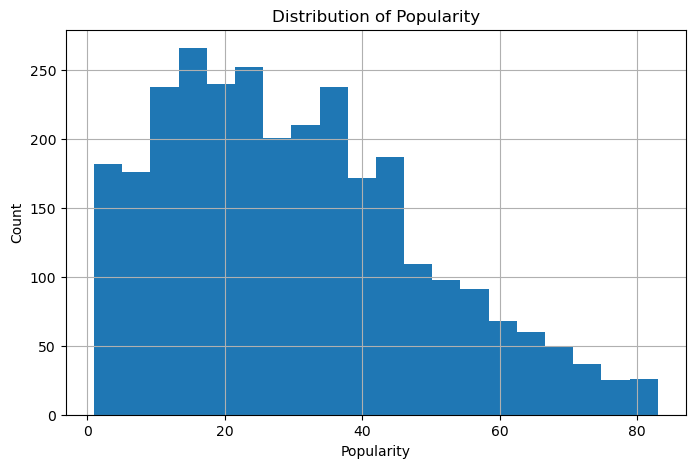

In [20]:
#Visualization for spread of popularities
df["popularity"].hist(bins=20, figsize=(8,5))
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

In [21]:
#Only keeping numerica columns. Any text columns removed are unnecessary for calculation
numeric_df = df.select_dtypes(include=[np.number]).copy()

X = numeric_df.drop(columns=['popularity'])
y = numeric_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=42
)

rf = RandomForestRegressor(random_state=42)

#Uitilizing grid search to tune the hyperparameters for the random forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R2:", grid.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 436, in _validate_par

Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best R2: -0.009040569702350076



Linear Regression
----------------------------------------
RMSE: 18.3985
R2: 0.0079

Random Forest
----------------------------------------
RMSE: 18.4216
R2: 0.0054

Ensemble (Average)
----------------------------------------
RMSE: 18.3413
R2: 0.0141


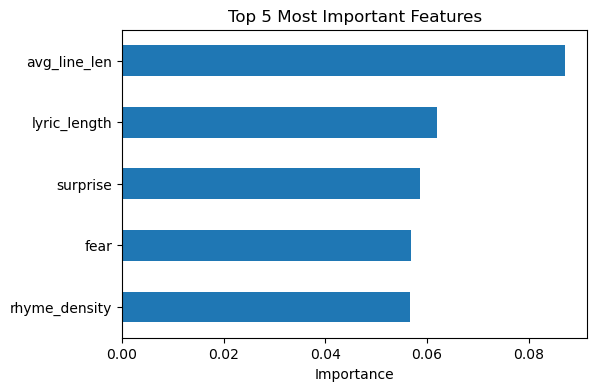

In [28]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

ensemble_pred = (lin_pred + rf_pred)/2

#Used to evaluate each model. Evaluation metrics were MSE and R2
def evaluate(name, true, pred):
    mse = mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    print(f'\n{name}')
    print('-' * 40)
    print(f'RMSE: {np.sqrt(mse):.4f}')
    print(f'R2: {r2:.4f}')

evaluate('Linear Regression', y_test, lin_pred)
evaluate('Random Forest', y_test, rf_pred)
evaluate('Ensemble (Average)', y_test, ensemble_pred)

#Visualizing feature importance
importances = rf_model.feature_importances_
feat_names = X.columns
feat_importance = pd.Series(importances, index=feat_names).sort_values(ascending=False)
top5 = feat_importance.head(5)
top5.plot(kind="barh", figsize=(6,4))
plt.title("Top 5 Most Important Features")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

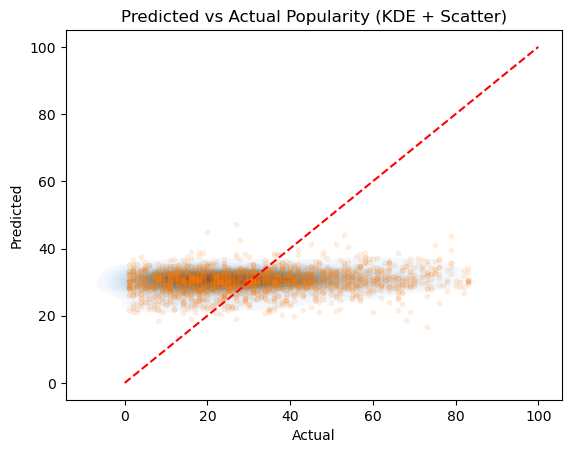

In [23]:
#Plotting predictions vs. Actual in the base model
sns.kdeplot(
    x=y_test, 
    y=ensemble_pred, 
    fill=True, 
    cmap="Blues", 
    thresh=0.05,
    levels=100
)
plt.scatter(y_test, ensemble_pred, alpha=0.1, s=10)
plt.plot([0,100], [0,100], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Popularity (KDE + Scatter)")
plt.show()

In [31]:
#Adding simple average of artist as a meta feature to increase predictive power
artist_pop = df.groupby("artist")["popularity"].mean()
df["artist_popularity"] = df["artist"].map(artist_pop)

numeric_df2 = df.select_dtypes(include=[np.number]).copy()

X2 = numeric_df2.drop(columns=['popularity'])
y2 = numeric_df2['popularity']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, train_size=0.2, random_state=42
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best R2:", grid.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
251 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 436, in _validate_par

Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best R2: -0.009040569702350076



Linear Regression 2
----------------------------------------
RMSE: 14.6634
R2: 0.3698

Random Forest 2
----------------------------------------
RMSE: 15.3025
R2: 0.3137

Ensemble (Average) 2
----------------------------------------
RMSE: 14.7490
R2: 0.3624


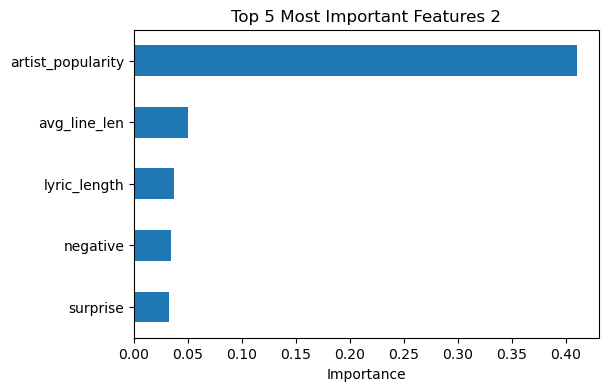

In [32]:
#Creating and evaluating the new models
lin_model.fit(X_train2, y_train2)
lin_pred2 = lin_model.predict(X_test2)

rf_model.fit(X_train2, y_train2)
rf_pred2 = rf_model.predict(X_test2)

ensemble_pred2 = (lin_pred2 + rf_pred2)/2

evaluate('Linear Regression 2', y_test2, lin_pred2)
evaluate('Random Forest 2', y_test2, rf_pred2)
evaluate('Ensemble (Average) 2', y_test2, ensemble_pred2)

importances2 = rf_model.feature_importances_
feat_names2 = X2.columns
feat_importance2 = pd.Series(importances2, index=feat_names2).sort_values(ascending=False)
top5_2 = feat_importance2.head(5)
top5_2.plot(kind="barh", figsize=(6,4))
plt.title("Top 5 Most Important Features 2")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

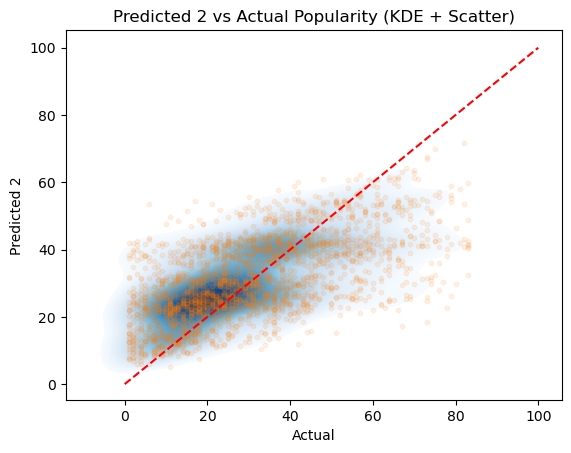

In [26]:
#Plotting the new model
sns.kdeplot(
    x=y_test2, 
    y=ensemble_pred2, 
    fill=True, 
    cmap="Blues", 
    thresh=0.05,
    levels=100
)
plt.scatter(y_test2, ensemble_pred2, alpha=0.1, s=10)
plt.plot([0,100], [0,100], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted 2")
plt.title("Predicted 2 vs Actual Popularity (KDE + Scatter)")
plt.show()

Text(0.5, 1.0, 'Average Line Length vs Popularity')

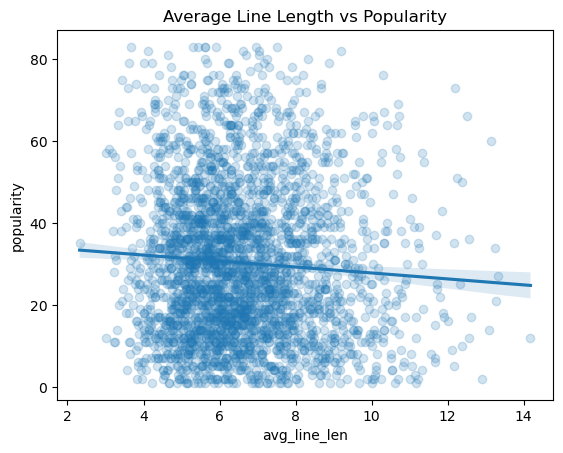

In [27]:
#Simple visualization to show one of the relationships between song structure and popularity
sns.regplot(x="avg_line_len", y="popularity", data=df, scatter_kws={'alpha':0.2})
plt.title("Average Line Length vs Popularity")